<a href="https://colab.research.google.com/github/vervainalthor/Hamoye-Internship/blob/master/Time_series_Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics	of	Time	Series
## Component	of	a	Time	Series
Time series is a collection of well-deϐined data points obtained sequentially over a set time period, usually taken at
equal time intervals. Time series allows for the analysis of important patterns that occur, such as trends and
seasonality. Depending on the domain of application, time series analysis can be used to forecast future values like
GDP, unemployment rates, population, mortality rate, global temperatures, pollution levels etc. Trend (T),
Seasonality(S), Cyclic variations (C) and Random or Irregular movements (I) are all components of a time series.
Trend: this a long term movement observed in time series that changes over time, which can either be positive
(increasing) or negative (decreasing).
### Seasonality:
it is a periodic ϐluctuation that occurs in time series where predictable and regular patterns are
exhibited at intervals; usually during a 12 month period. These ϐluctuations can be hourly, daily, weekly, monthly, or
quarterly; they may be caused by seasons, habits, weather, traditions etc.
### Cyclic variations:
these are oscillations occurring around a given trend in time series. The duration of a cycle varies
based on the domain and business being analysed. The length of a cycle is described as the period.
### Irregular movements: 
This is the residual after trend and seasonality have been removed from a time series. These
are irregular variations that are unforeseen; cannot be predicted; and unlikely to be repeated.
## Series	and	Stochastic	Process
A stochastic process is a statistical occurrence that consists of a collection of random variables ordered in time.
Stochastic processes are often used in modelling time series data and considered to generate an inϐinite collection of
all possible time series that may have been observed. One realization of a stochastic process is considered an
observed time series while an ensemble of a stochastic process is a statistical population.
## Concept	of	Stationary	and	Seasonality
A stationary time series is one where the statistical properties, such as mean and variance, do not change over time.
This means that a stationary time series does not have any periodic ϐluctuations or trend. Many methods and tools
for time series analysis have an underlying assumption that the time series is stationary. Hence, it is common to
transform a non-stationary time series to stationary, by differencing to remove trend and seasonality.



## Non-stationary time series
### Model parsimony
The principle of parsimony which is attributed to an English philosopher, William of Occam, suggests that given a set
of equally good explanations for a phenomenon, the correct answer is the simplest explanation. Similarly in
statistical modelling, a parsimonious model is one that has a great explanatory predictive power, and explains data
with the minimum number of predictor variables or parameters. These models have just the right amount of
predictors required to explain the model. As such, linear models are more preferable than non-linear models;
experiments that depend on few assumptions should also be preferred to those that depend on many.

# lesson 2- Wrangling	Time	Series	Data
As expected in any data analysis task, proper cleaning and preprocessing of the data is required.
Handling	Missing	Time	Series	Data,	Upsampling	and	Downsampling
Missing data is a common occurrence that happens during data collection, due to faulty entries or outright omission.
Time series data is no exception to this problem. Imputation, interpolation and deletion of missing data points are
methods used to handle missing data in time series.
### Imputation: 
Missing values are ϐilled based on the overall observation of the entire data. They can be imputed using
forward ϐill, where the last known data point before the missing value is used, and the opposite with backward ϐill
where the next known value is used. The ϐillna() function in pandas is used to impute time series data for both
forward and backward ϐill strategies. It is worth noting that backward ϐill is not an appropriate imputation method,
when the data will be used in a predictive model. Another method of imputing missing values is by using a rolling
mean or median, known as the moving average. Unlike the forward ϐill, data from multiple recent times in the past
are used in moving average to ϐill missing values. This is a better option, particularly when the data is noisy, to avoid
inputting random noise.
## Interpolation: 
This is another form of imputation where data points used to ϐill missing values are estimated, such
that they ϐit the constraints that arise from neighbouring data points. For example, if the overall behaviour of the
time series is quadratic, this trend can be incorporated when ϐilling the missing values, such that they have a similar
trend. The interpolate() function is provided in pandas to interpolate missing values.
When handling missing data, any method selected can be as a result of the domain and aim of the task.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




Text(0, 0.5, 'Passengers')

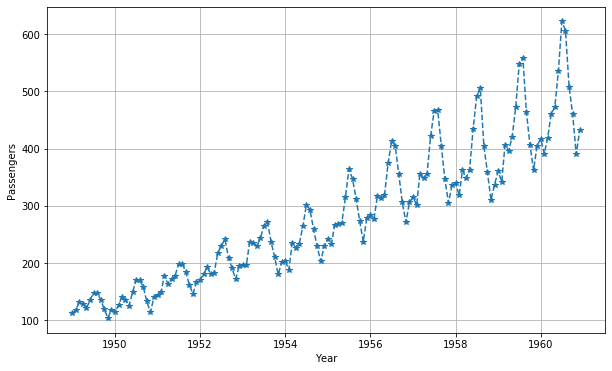

In [ ]:
df = pd.read_csv('C:/Users/ADEKALU ADEBOLA/Documents/airlinepassengers.csv')
df["Month"] = pd.to_datetime(df["Month"]) #convert column to datetime
df.set_index("Month", inplace=True)
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [ ]:
#check for missing values
df.isnull().values.any()

False

In [ ]:
#There are no missing values in our dataset however, in bid to explain how we handle
#missing values, we will make a copy of our dataset and delete some values at random.
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.isnull().sum()
#There are now 14 missing values in the dataset
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()
#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

### Resampling 
is a method of changing the time period of time series observations such that it can be summarised or
aggregated. The frequency can either be increased by upsampling or reduced by downsampling.
### Downsampling: 
This reduces the number of samples in the data such that multiple data points are aggregated
together. For example, if the temperature in a region is reported every minute and data for the past hour is required,
3600 data points will be obtained. If data for an entire week is needed, 604800 data points will be returned. This
becomes quite messy when graphed but can be easily reduced by downsampling. The level of granularity of the
original data might not be sensible or informative, because it was sampled too frequently. Additionally,
downsampling helps focus on a speciϐic portion of a seasonal cycle by creating subseries for that season. A dataset
can match other low-frequency datasets by downsampling.
### Upsampling:
In contrast to downsampling, upsampling tries to create more data points from infrequent samples,
such as changing the time period from minutes to seconds. Although this creates more samples, it does not
necessarily add more information to the data. When a time series is irregular, it can be converted to a regular time
series by upsampling

In [ ]:
#Downsample to quarterly data points
df_quarterly = df.resample('3M').mean()
#Upsample to daily data points
df_daily = df.resample('D').mean()

Text(0, 0.5, 'Passengers')

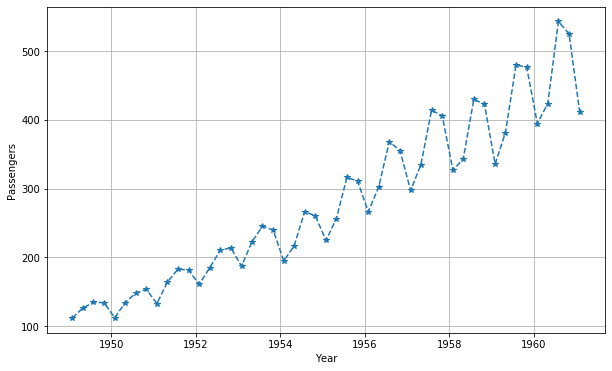

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_quarterly.index, df_quarterly.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

Text(0, 0.5, 'Passengers')

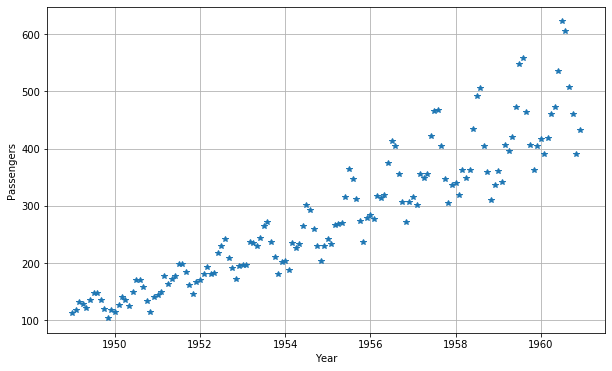

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

## Smoothing	Time	Series	Data
Smoothing is often applied to time series data to help identify patterns better and generally make data more
understandable. Irregular roughness is often smoothened out to see clearer signals at lower frequencies by removing
higher frequency behaviour. Smoothing can also be described as a preprocessing technique that removes noise from
a dataset. There are several time series smoothing techniques, some of which include moving average, exponential
smoothing, and Holt’s method.
### Moving average smoothing
: this is an effective and naive technique that involves determining the weighted
averages of observed values, or previous observations surrounding a certain time. A sliding window with a speciϐied
window size, known as the window width, is slid across the series to calculate the average values. It can either be
centered where observations before and after time t are used or trailing where observations before or at time t are
used.

In [ ]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()

Text(0, 0.5, 'Passengers')

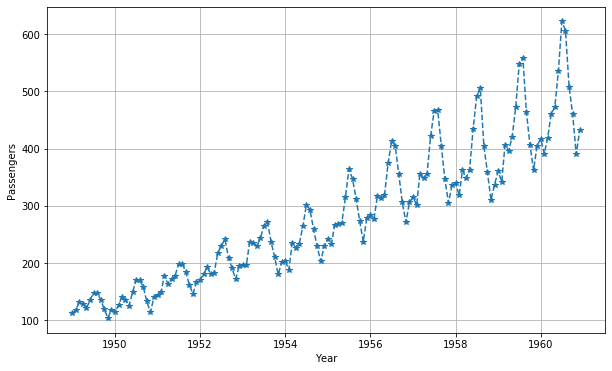

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_MA.index, df_MA.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

### Exponential smoothing:
this technique handles various time points differently during smoothing, because more
recent data might be more informative. It assigns an exponentially decreasing weights as the observations get older. It
can be described as a weighted moving average. There are three major types of exponential smoothing methods,
namely: single, double, and triple exponential smoothing. Single exponential smoothing is used for univariate time
series data that have no trend or seasonality. The smoothing coefϐicient (alpha), usually between 0 and 1 is the single
parameter required to control the decay and inϐluence of previous observations. On the other hand, double
exponential smoothing can be used for univariate time series that have a trend. It includes an additional parameter
(beta) that controls the decay of the inϐluence of trend. Finally, the triple exponential smoothing is an extension that
can handle univariate time series, that have both trend and seasonality with the inclusion of gamma - a third
parameter that controls the inϐluence of seasonality.
## Time	Series	Speciϐic	Exploratory	Methods

Exploratory data analysis helps identify patterns and structure in a dataset. It provides an initial understanding of the
data and guide towards the ϐirst modelling steps. In time series, it is important to identify any seasonality, trend, or
stationarity in the series so that the appropriate model can be used to forecast future values.

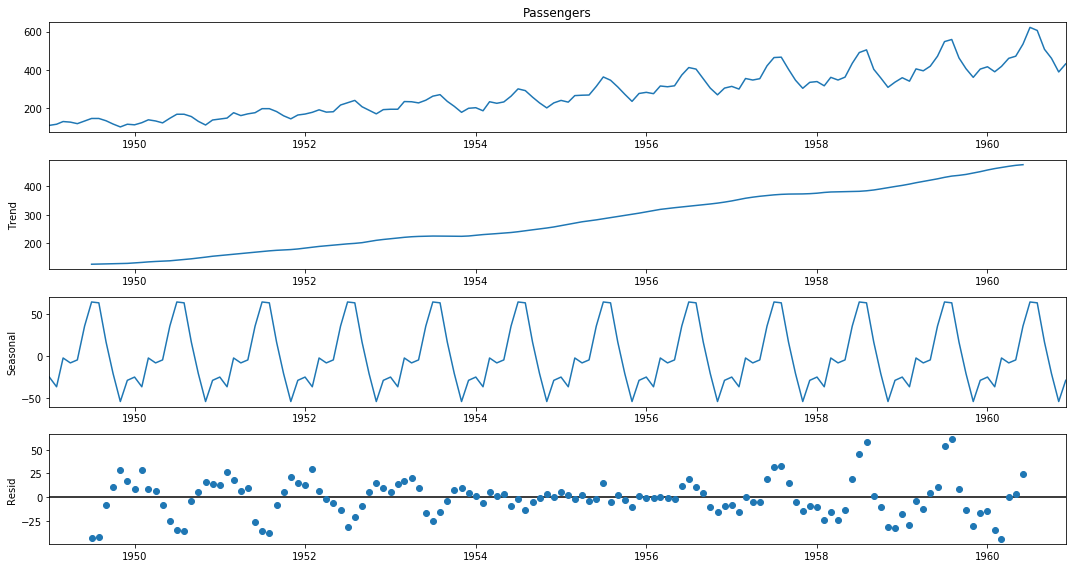

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series.plot()
plt.show()

In [ ]:
#The decomposed time series show an obvious increasing trend and seasonality variations.
#Recall that we have initially plotted the moving average on the last 12 months which showed
#that it varies with time. This suggests that the data is not stationary. We will now perform
#an ADF test to confirm this speculation
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f' {k}: {v}')
#results in

ADF Statistic: 0.8153688792060497
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used : 130
Critical Values:
 1%: -3.4816817173418295
 5%: -2.8840418343195267
 10%: -2.578770059171598


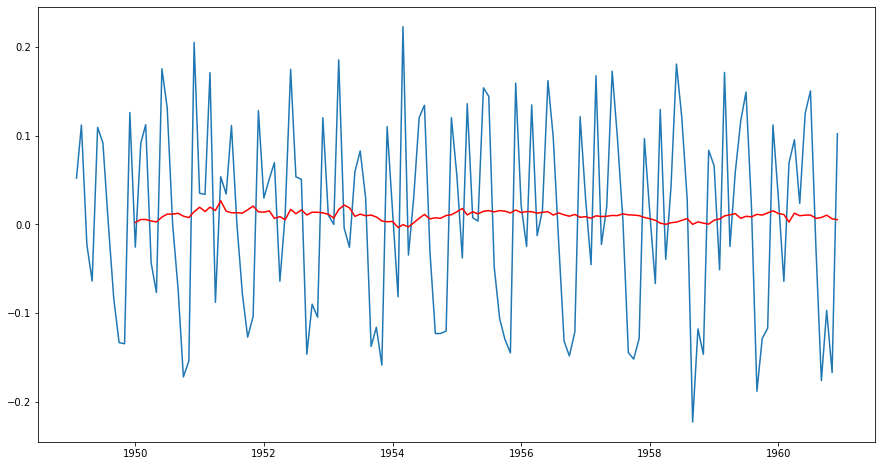

In [ ]:
#From the results obtained, the p-value is greater than the critical value at a 5%
#significance level and, the ADF statistic is greater that any of the critical valuesobtain. #This confirms that the series is indeed non-stationary.
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

# Forecasting	Performance	Measures
## Various	Forecast	Performance	Measures
As we have emphasised in previous modules, it is essential to correctly evaluate our models with the appropriate
metrics. In time series forecasting, there are a number of measures that can be used to evaluate how well a model
performs. We will discuss some of these below.
### Mean Absolute Error (MAE):
This is a measure of the forecast error obtained by taking the average of the absolute
errors of the forecasted values, where the error is the difference between the forecasted value and the true value.
Simply put, it tells the average of the error that should be expected from a forecast. The MAE is robust to outliers and
scale-dependent error so it cannot be used to compare different series.

# $^1/_n$$\sum_{i}|$y<sub>i</sub>- $\hat{y}$<sub>i</sub>|

 
#### where y<sub>i</sub> = true value

#### $\hat{y}$<sub>i</sub> = predicted value


### Mean Absolute Percentage Error (MAPE): 
It is a well known measure used to determine the accuracy of a
forecasting method. The accuracy is calculated as a percentage, such that the average of the difference between the
actual value and the forecast value is divided by the actual value. The average of the sum of the absolute value of this
calculation for every data point forecasted is multiplied by 100 to obtain a percentage error. MAPE can be easily
interpreted and scale independent; and should not be used with low-volume data. In addition, it should not be used
when the values are zero or close to zero, because it results in undeϐined and indeϐinite values.

# ( $^1/_n$$\sum_{i}|$y<sub>i</sub>- $\hat{y}$<sub>i</sub>|)*100




### Root Mean Square Error (RMSE): 
The RMSE calculates square root of the average of the squared errors (i.e. the
square of the difference between the actual and forecasted value). This measure tends to exaggerate large errors by
giving a relatively high weight to large errors, because it takes the square root of the average squared errors. The
Mean Squared Error (MSE) is simply the average of the square of the errors.
If yi and y ^i represent the actual value and forecasted value
respectively,then

 $\text{Root mean squared error (RMSE|RMSD)}= \sqrt{\frac{\displaystyle \sum_{i=1}^N (Y_i-\hat{Y_i})^2}{N}}$

# Time	Series	Forecasting	Using	Stochastic	Models
There are several models that can be used to forecast time series, some which we will discuss in this section.
1. Autoregressive Moving Average (ARMA) Models
2. Autoregressive Integrated Moving Average (ARIMA) Models
3. Seasonal Autoregressive Integrated Moving Average (SARIMA) Models
### Autoregressive Model (AR): 
This is a linear combination of previous values of the variable being forecasted. It can
be likened to a linear regression of the observations in the current series, against the past values from that same
series. It is referred to as autoregressive, because it is a regression of the variable against itself. The number of past
time steps to be inputted is determined by a single argument, p.
### Moving Average Model (MA):
MA models consider past residuals. Instead of using past values as in AR models, MA
models use previous forecast errors to model the next step in the sequence. The order of the model is speciϐied with
the q parameter as in MA(q). While this might be mixed up with the moving average described above, the MA model
is used to forecast future values while the smoothing technique allows for estimating trend cycles of previous
observations.
### Autoregressive Moving Average (ARMA):
As the name suggests, ARMA(p, q) is a combination of the AR and MA
models. It models the future values in the series as a linear combination of the observations and the errors of
previous time steps.
#### Autoregressive Integrated Moving Average (ARIMA): 
Although very similar to ARMA, ARIMA includes a
differencing phase called integration, where the series is made stationary. ARIMA(p,d,q) includes a third parameter d
which represents the number of non-seasonal differences required to make the data stationary. A non-seasonal time
series that is not a random white noise and shows patterns can be modeled with an ARIMA model.
### Seasonal Autoregressive Integrated Moving Average (SARIMA): 
This is an extension of the ARIMA model
performed at the seasonal level. It is represented as ARIMA(p,d,q)(P, D, Q)m, where the new variables (P, D, Q)
represent p,d,q for the seasonal part of the series; m represents the number of periods in each session. SARIMA
factors in seasons by differencing the current value ,and its value in the previous season.
## Stationarity	Analysis,	Autocorrelation,	and	Partial	Autocorrelation	Functions	(ACF	&	PACF)
Having discussed the importance of a stationary time series in forecasting, we now identify methods that can be used
to test for stationarity. Visualisations, statistical tests and summary statistics are commonly used to check that a
series is stationary.
### Visualisations: 
As done when exploring data for data analysis tasks, visualising datasets tend to give a quick view to
patterns present. Though it is not dependable; but it is possible to visually determine if there is a known stationarity
property present by plotting time series data. Plots can show an obvious lack of trend and seasonality in the series.
### Statistical tests: 
These can be used to check if the expectations of a stationary time series are met. An example is the
unit root test used to check for the presence of a trend in a series if it has a unit root. For the test, the null
hypothesis H , proposes that the series is non-stationary (time-dependent) because it has a unit root. If the null
hypothesis is rejected, the alternate hypothesis H1 proposes that the series is independent of time and does not have
a unit root, hence, it is stationary. As in statistical tests, a threshold is set for the p-value to reject the hypothesis. If a
threshold is set at 5%, then a p-value > 0.05 will fail to reject the null hypothesis, suggesting that the time series is
non-stationary. However, with a p-value <= 0.05, we can reject the null hypothesis and conclude that the series has
no unit, hence, it is stationary. The Augmented Dickey-Fuller (ADF) test is a well known unit root statistical test that
allows for higher order autoregressive processes. It is an extension of the Dickey-Fuller (DF) test used for more
complex and larger time series models. In python, the adfuller() function used for the test can be found in the
statsmodel package. Another unit root test is the KPSS test. With this test, the null and alternate hypothesis are
opposites of the ADF test. Summarily, for the KPSS test, the null hypothesis H0 suggests that the series is stationary
while the alternate hypothesis suggests that the series is non-stationary.
### Summary statistics:
By splitting the series into different groups and comparing the mean and variance across them,
there is a high chance that the series is non-stationary if there is a signiϐicant difference among the groups.

### Autocorrelation Function (ACF): 
Autocorrelation refers to the correlation between the past values in a time series.
It measures the linear relationship between lagged values in the series. The ACF plot or correlogram is used to display
the autocorrelation in a time series by lag. The correlation coefϐicient between -1 and 1 is displayed on the y-axis,
and the lags are displayed on the x-axis.
### Partial Autocorrelation Function (PACF): 
PACF gives the partial correlation of a stationary series with its lagged
values not accounted for by prior lagged observations. This gives an overview of the relationship between an
observation in a series, and observations in previous time steps while removing interfering observations. The PACF
at a speciϐic lag, is the correlation that occurs after removing the effect of any correlations as a result of shorter lags.
In contrast to ACF, it controls for other lags.
The ACF and PACF plots are displayed as bar charts showing conϐidence intervals at 95% and 99% as horizontal lines
across the bars. Any bar that crosses these intervals is deemed to be more signiϐicant and noteworthy

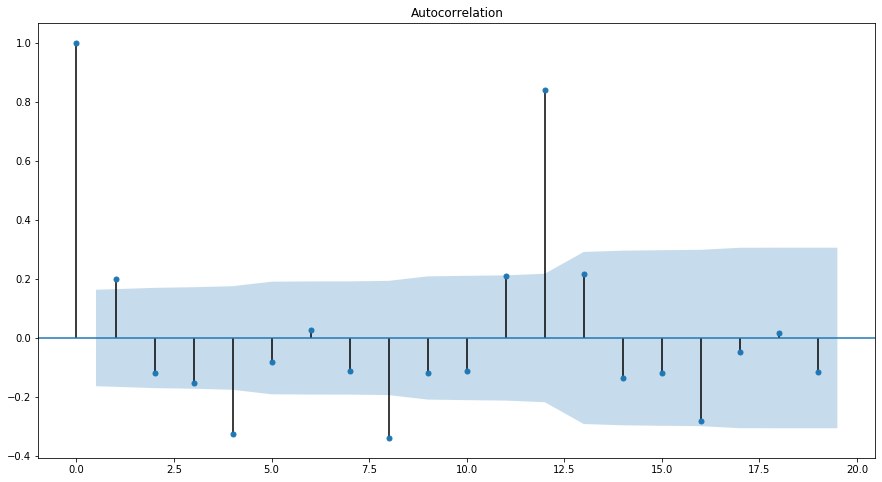

In [ ]:
df_diff = df_diff.fillna(method='bfill')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF

plot_acf(df_diff, lags = range(0,20))
plt.show()

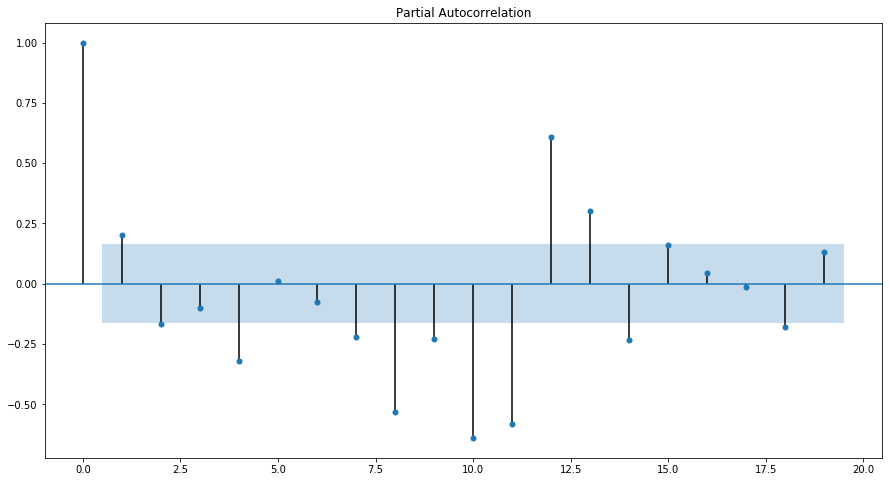

In [ ]:
#PACF
plot_pacf(df_diff, lags = range(0,20))
plt.show()

In [ ]:
#The shaded regions in the plots are the confidence intervals. The lags where the PACF #and ACF ch
#The shaded regions in the plots are the confidence intervals. The lags where the PACF and #ACF ch
#In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly #in t
#AR, MA and ARIMA
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()

C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


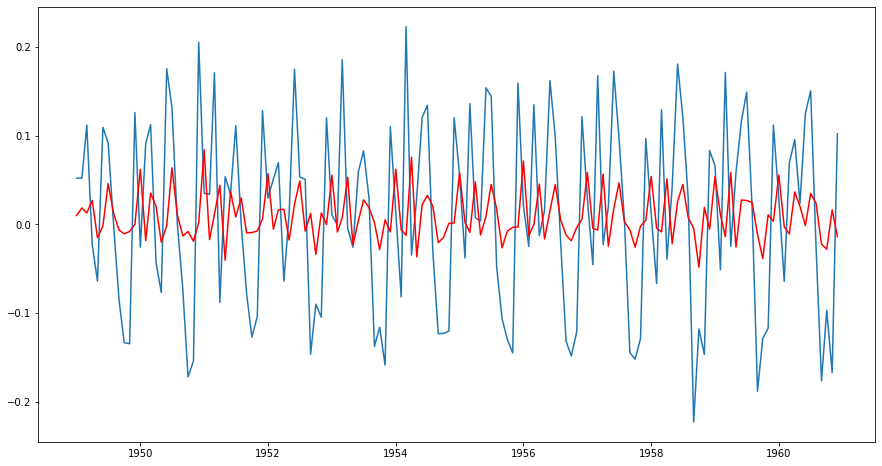

In [ ]:
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues,color='red')

C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


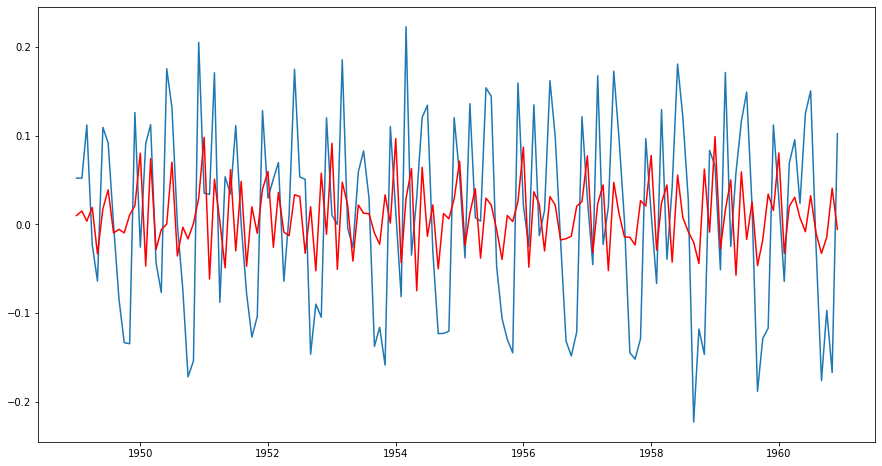

In [ ]:
MA_model = ARIMA(df_diff, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

C:\Users\ADEKALU ADEBOLA\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


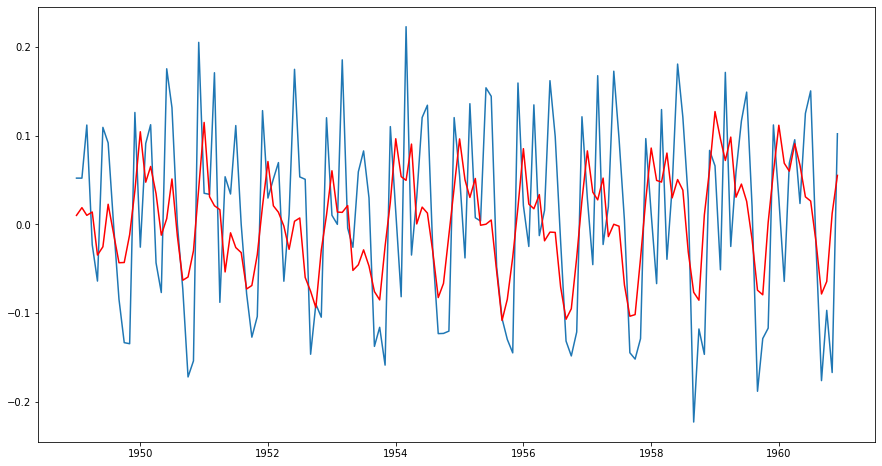

In [ ]:
ARIMA_model = ARIMA(df_diff, order=(2,0,1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color='red')

## Box-Jenkins	Methodology
This is a method by George Box and Gwilym Jenkins that suggests that the process from which a time series was
generated, can be modelled with ARMA if stationary, and ARIMA if non-stationary. It is an iterative approach that
involves a three stage modelling approach which includes identiϐication, estimation, and diagnostic checking.
### Identiϐication: 
The initial step involves identifying if the series is stationary; the number of differences required to
make it stationary if it is non-stationary; and to identify the order of the autoregressive and moving average terms - p
and q respectively. They recommend a differencing approach to achieve stationarity. Unit roots statistical tests can
be used to test for stationarity after each differencing round. It is important to prevent over differencing to avoid the
inclusion of more complexity and extra serial correlation. ACF and PACF plots are used to obtain q and p such that if
there is a strong cut-off in the PACF after a lag, and the ACF trails off after a lag, the model is AR. If the
autocorrelations are cut off after a few lags, then the last lag with a large value will be the estimated value of q.
However, an autoregressive model or an ARIMA model with positive values for p and q are obtained if the
autocorrelations do not cut off. For a MA model, there is a strong cut-off in the ACF after the lag and the PACF trails
off after a lag. The PACF determines p such that if the partial autocorrelations are cut off after a few lags, p will be the
last lag with a large value. Similarly, if the partial autocorrelations do not cut off, a moving average model is obtained,
or an ARIMA model with positive p and q values.
### Estimation:
Numerical methods that involve maximum likelihood estimation is used to minimize the error term.
This can be a calculation intensive and complicated process; the reason why the parameter estimation is left to be
solved by software.
Diagnostic checking: The model is checked properly to ensure that it is not overϐitting and capturing random noise.
An ideal model should have errors that resemble white noise. In addition, the residuals of the model are inspected to
conϐirm that there is no additional structure. Finally, a suitable model is selected.


# Time	Series	at	Scale
Prophet is an open-source library for univariate time series forecasting developed by Facebook. It implements
decomposable additive models that support trends, seasonality and holidays. The components of the model can be
combined such that


y(t) = g(t) + s(t) + h(t) + 𝝐t



Where;
y(t) is the forecast;

g(t) is the piecewise linear or logistic growth curve trend that models non-periodic changes in time series;

s(t) represents the seasonality in the series for periodic changes;

h(t) allows for irregularities by factoring in the effects of speciϐied holidays;

𝝐tis the error term in the model for unusual changes.




Prophet helps automate the calculation of terms within the model and prevents forecast errors. This library
forecasts data by using either of two models: the logistic growth model for non-linear data, or the piecewise linear
model for data with linear properties, but selects the latter by default. The library provides easy to tune and intuitive
parameters that can be used without necessarily being a forecasting expert.

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


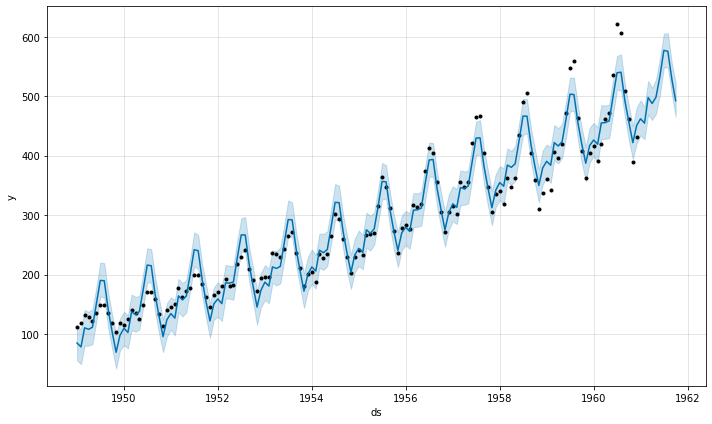

In [4]:
from fbprophet import Prophet
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month']= pd.to_datetime(df['Month'])
df = df.rename(columns={"Month": "ds", "Passengers": "y"})
df.head()
model = Prophet()
model.fit(df)
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)
plt.show()

## Time	series	using	Neural	Networks

As opposed to the classical forecasting methods that assume that there is a linear relationship between the inputs and
outputs, neural networks can approximate nonlinear functions without having prior information about the
properties of the series. Neural networks can support multiple inputs and outputs; and learn complex mappings
between them. Multilayer perceptron (MLPs) are robust to noise and missing values; Convolutional Neural Networks
(CNNs) have the ability to automatically extract features from raw data, which can be done to time series; Recurrent
Neural Networks (RNNs), and Long Short-Term Memory Networks (LSTMs) support for sequences in input data as
in time series.